In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas_profiling import ProfileReport
import pickle

## Data Collection

In [375]:
df = pd.read_csv(r'D:\Hamoye DS Internship\energydata_complete.csv')

In [376]:
df1 = df.copy(())

## Data Exploration and Wrangling

In [275]:
df.sample(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
14464,2016-04-21 03:40:00,30,0,21.76,35.090000,19.100000,37.590000,23.000000,36.790000,22.100000,...,20.200000,38.966667,6.800000,763.466667,71.666667,4.000000,32.666667,2.033333,36.675297,36.675297
4298,2016-02-10 13:20:00,60,0,20.60,41.090000,19.790000,39.500000,21.000000,39.900000,19.290000,...,19.166667,43.966667,4.966667,742.033333,93.000000,6.666667,28.333333,3.933333,22.855091,22.855091
9893,2016-03-20 09:50:00,230,0,20.79,36.590000,18.100000,39.663333,21.666667,35.363333,19.790000,...,19.390000,38.463333,5.516667,761.850000,78.500000,3.166667,26.833333,2.100000,4.397409,4.397409
4224,2016-02-10 01:00:00,70,0,22.23,42.266667,21.500000,40.500000,22.600000,43.290000,19.100000,...,18.926667,44.066667,3.300000,739.000000,88.000000,8.000000,64.000000,1.500000,43.060186,43.060186
5576,2016-02-19 10:20:00,170,0,19.60,36.863333,18.323333,36.526667,19.700000,36.751429,18.323333,...,17.390000,36.212857,2.633333,760.800000,87.666667,2.333333,21.666667,0.766667,44.242516,44.242516


In [357]:
df.columns


Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [358]:
renamed_columns = {'Appliances': 'Appliances_energy', \
                   'T1': 'Kitchen_temp', 'RH_1': 'Kitchen_humidity', \
                   'T2': 'Livingroom_temp', 'RH_2': 'Livingroom_humidity', \
                   'T3': 'Laundryroom_temp', 'RH_3': 'Laundryroom_humidity', \
                   'T4': 'Officeroom_temp', 'RH_4': 'Officeroom_humidity', \
                   'T5': 'Bathroom_temp', 'RH_5': 'Bathroom_humidity', \
                   'T6': 'Northside_temp', 'RH_6': 'Northside_humidity', \
                   'T7': 'Ironingroom_temp', 'RH_7': 'Ironingroom_humidity', \
                   'T8': 'Teenager_room_temp', 'RH_8': 'Teenager_room_humidity', \
                   'T9': 'Parents_room_temp', 'RH_9': 'Parents_room_humidity', \
                   'T_out': 'Weather_station_temp', 'Press_mm_hg': 'Weather_station_pressure', \
                   'RH_out': 'Weather_station_humidity','Tdewpoint': 'Weather_station_dewpoint'}
df.rename(columns = renamed_columns, inplace = True)

In [359]:
df.head()

,date,Appliances_energy,lights,Kitchen_temp,Kitchen_humidity,Livingroom_temp,Livingroom_humidity,Laundryroom_temp,Laundryroom_humidity,Officeroom_temp,...,Parents_room_temp,Parents_room_humidity,Weather_station_temp,Weather_station_pressure,Weather_station_humidity,Windspeed,Visibility,Weather_station_dewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [360]:
# For consistency make all the column names lower case
df.columns = [x.lower() for x in df.columns]

df.columns

Index(['date', 'appliances_energy', 'lights', 'kitchen_temp',
       'kitchen_humidity', 'livingroom_temp', 'livingroom_humidity',
       'laundryroom_temp', 'laundryroom_humidity', 'officeroom_temp',
       'officeroom_humidity', 'bathroom_temp', 'bathroom_humidity',
       'northside_temp', 'northside_humidity', 'ironingroom_temp',
       'ironingroom_humidity', 'teenager_room_temp', 'teenager_room_humidity',
       'parents_room_temp', 'parents_room_humidity', 'weather_station_temp',
       'weather_station_pressure', 'weather_station_humidity', 'windspeed',
       'visibility', 'weather_station_dewpoint', 'rv1', 'rv2'],
      dtype='object')

In [361]:
# Check the datatypes count of the dataset

df.dtypes.value_counts()

float64    26
int64       2
object      1
dtype: int64

In [362]:
# get a general intuition about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      19735 non-null  object 
 1   appliances_energy         19735 non-null  int64  
 2   lights                    19735 non-null  int64  
 3   kitchen_temp              19735 non-null  float64
 4   kitchen_humidity          19735 non-null  float64
 5   livingroom_temp           19735 non-null  float64
 6   livingroom_humidity       19735 non-null  float64
 7   laundryroom_temp          19735 non-null  float64
 8   laundryroom_humidity      19735 non-null  float64
 9   officeroom_temp           19735 non-null  float64
 10  officeroom_humidity       19735 non-null  float64
 11  bathroom_temp             19735 non-null  float64
 12  bathroom_humidity         19735 non-null  float64
 13  northside_temp            19735 non-null  float64
 14  norths

In [363]:
# Check for duplicate entries
df.duplicated().sum()

0

In [364]:
# Check for empty null entries

df.isnull().sum()

date                        0
appliances_energy           0
lights                      0
kitchen_temp                0
kitchen_humidity            0
livingroom_temp             0
livingroom_humidity         0
laundryroom_temp            0
laundryroom_humidity        0
officeroom_temp             0
officeroom_humidity         0
bathroom_temp               0
bathroom_humidity           0
northside_temp              0
northside_humidity          0
ironingroom_temp            0
ironingroom_humidity        0
teenager_room_temp          0
teenager_room_humidity      0
parents_room_temp           0
parents_room_humidity       0
weather_station_temp        0
weather_station_pressure    0
weather_station_humidity    0
windspeed                   0
visibility                  0
weather_station_dewpoint    0
rv1                         0
rv2                         0
dtype: int64

In [365]:
# get the number of unique values per column
df.apply(lambda x: len(x.unique()))
# df.appliances_energy.nunique()

date                        19735
appliances_energy              92
lights                          8
kitchen_temp                  722
kitchen_humidity             2547
livingroom_temp              1650
livingroom_humidity          3376
laundryroom_temp             1426
laundryroom_humidity         2618
officeroom_temp              1390
officeroom_humidity          2987
bathroom_temp                2263
bathroom_humidity            7571
northside_temp               4446
northside_humidity           9709
ironingroom_temp             1955
ironingroom_humidity         5891
teenager_room_temp           2228
teenager_room_humidity       6649
parents_room_temp             924
parents_room_humidity        3388
weather_station_temp         1730
weather_station_pressure     2189
weather_station_humidity      566
windspeed                     189
visibility                    413
weather_station_dewpoint     1409
rv1                         19735
rv2                         19735
dtype: int64

In [366]:
# Change the date column to date time
df.date = pd.to_datetime(df.date)

In [367]:
# Extract the different parts of the date from the date column
df['month'] = df.date.dt.month
df['weekday'] = df.date.dt.weekday
df['hour'] = df.date.dt.hour
df['week'] = df.date.dt.isocalendar().week

In [368]:
df.head()

,date,appliances_energy,lights,kitchen_temp,kitchen_humidity,livingroom_temp,livingroom_humidity,laundryroom_temp,laundryroom_humidity,officeroom_temp,...,weather_station_humidity,windspeed,visibility,weather_station_dewpoint,rv1,rv2,month,weekday,hour,week
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,92.0,7.000000,63.000000,5.3,13.275433,13.275433,1,0,17,2
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,92.0,6.666667,59.166667,5.2,18.606195,18.606195,1,0,17,2
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,92.0,6.333333,55.333333,5.1,28.642668,28.642668,1,0,17,2
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,92.0,6.000000,51.500000,5.0,45.410389,45.410389,1,0,17,2
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,92.0,5.666667,47.666667,4.9,10.084097,10.084097,1,0,17,2


In [369]:
# Apply the describe method to the dataset to get a deeper intuition about it

df.describe().T

,count,mean,std,min,25%,50%,75%,max
appliances_energy,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
kitchen_temp,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
kitchen_humidity,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
livingroom_temp,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
livingroom_humidity,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
laundryroom_temp,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
laundryroom_humidity,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
officeroom_temp,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
officeroom_humidity,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


In [370]:
# Lets get an intuition of how the attributes are correalted
df.corr()

,appliances_energy,lights,kitchen_temp,kitchen_humidity,livingroom_temp,livingroom_humidity,laundryroom_temp,laundryroom_humidity,officeroom_temp,officeroom_humidity,...,weather_station_humidity,windspeed,visibility,weather_station_dewpoint,rv1,rv2,month,weekday,hour,week
appliances_energy,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145,-0.011606,0.003060,0.216792,-0.011356
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521,-0.179452,-0.099828,0.255346,-0.186486
kitchen_temp,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203,0.706305,0.001381,0.178858,0.694857
kitchen_humidity,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699,-0.094048,-0.053782,0.018594,-0.100089
livingroom_temp,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087,0.533479,0.000602,0.254784,0.512884
livingroom_humidity,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275,-0.097914,-0.044249,-0.183322,-0.089292
laundryroom_temp,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194,0.790365,-0.017514,0.037624,0.792694
laundryroom_humidity,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477,-0.414359,-0.035182,-0.052392,-0.429332
officeroom_temp,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815,0.789168,-0.091006,0.088407,0.785036
officeroom_humidity,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787,-0.258167,-0.005749,-0.019068,-0.262366


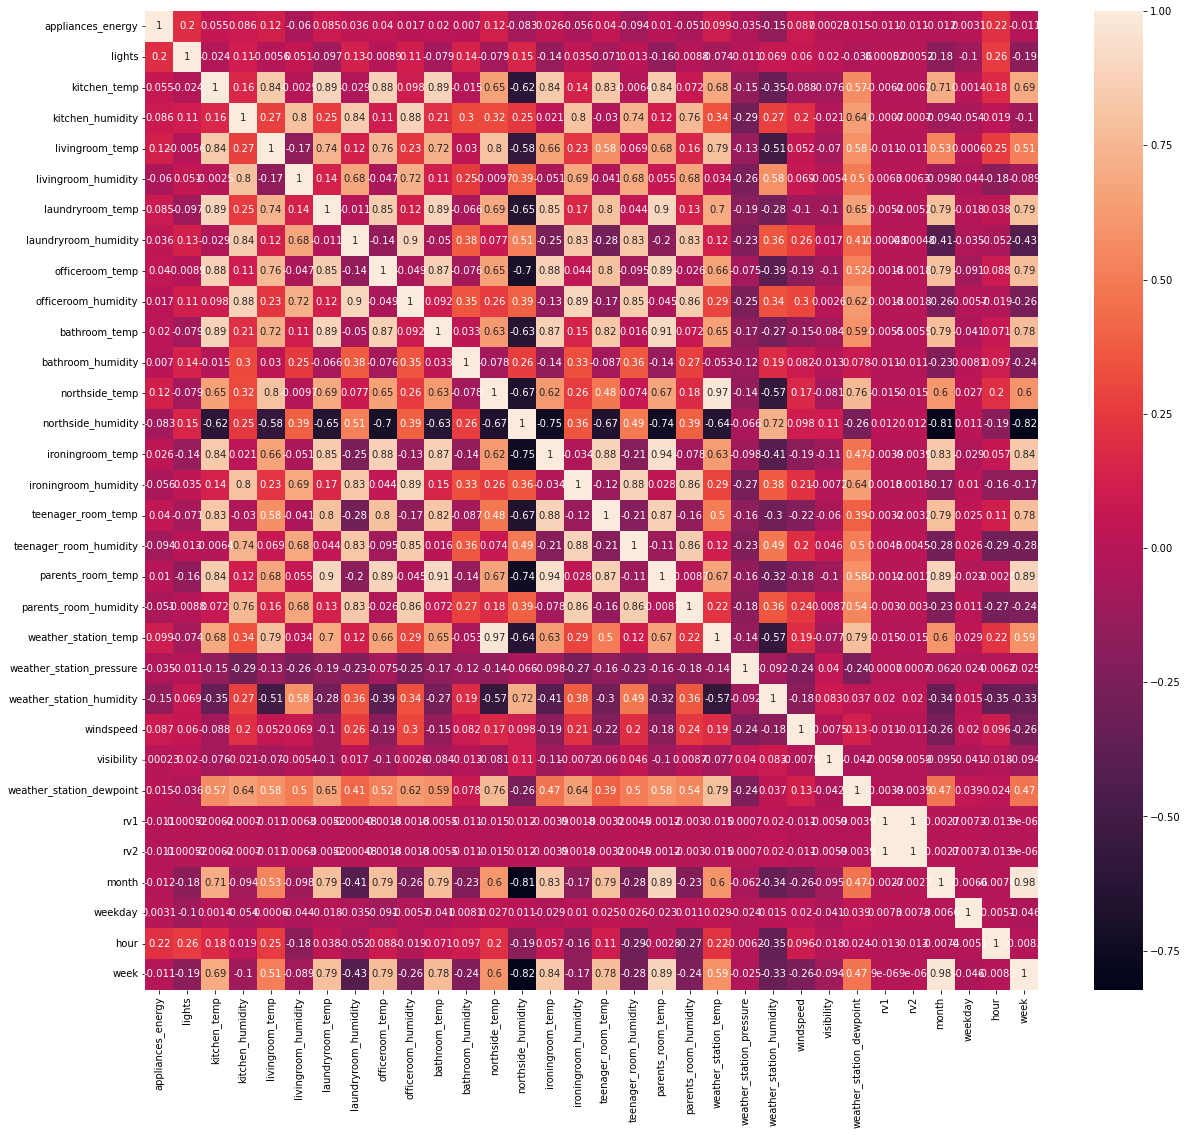

In [371]:
fig = plt.figure(figsize=(20, 18))
sns.heatmap(df.corr(), annot = True, cbar = True);

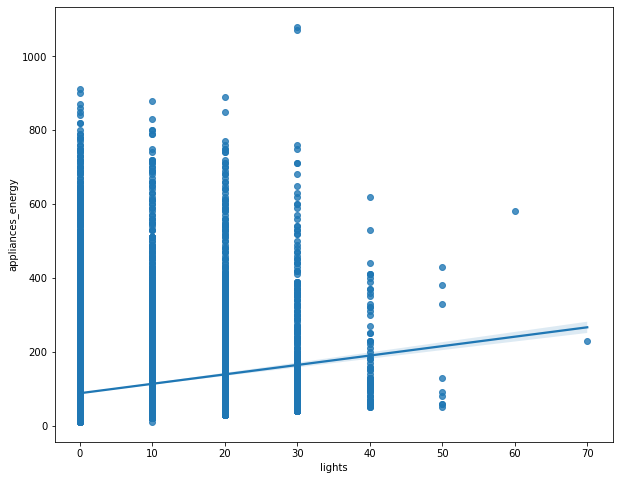

In [372]:
fig = plt.figure(figsize=(10, 8))
sns.regplot(data = df, y = df.appliances_energy, x = df.lights);

In [373]:
# Drop the date column

df.drop(columns = ['date', 'week'], inplace = True)

In [374]:
# color = sns.color_palette()[-2]
cols = [column for column in df.columns if column != 'appliances_energy']

In [235]:
# def reg_plots(data, x, y = df.appliances):
#     col = [column for column in df.columns if column != 'appliances']
#     fig = plt.figure(figsize=(10, 8))
#     sns.regplot(data, y, x = df['col'])
#     return plt.show()

## Modeling

In [294]:
X = df[cols]
y = df['appliances_energy']

In [295]:
# df.week.value_counts()

In [297]:
X.head()
y.head()

,lights,kitchen_temp,kitchen_humidity,livingroom_temp,livingroom_humidity,laundryroom_temp,laundryroom_humidity,officeroom_temp,officeroom_humidity,bathroom_temp,...,weather_station_pressure,weather_station_humidity,windspeed,visibility,weather_station_dewpoint,rv1,rv2,month,weekday,hour
0,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,1,0,17
1,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,1,0,17
2,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,1,0,17
3,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,1,0,17
4,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,1,0,17


0    60
1    60
2    50
3    50
4    60
Name: appliances_energy, dtype: int64

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 38)

In [299]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (15788, 30)
Train target shape   :  (15788,)
Test features shape  :  (3947, 30)
Test target shape    :  (3947,)


In [300]:
# from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression


from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import time
from math import sqrt


In [301]:
# Putting models in a dictionary

models = {
    'XGBoost Regressor': XGBRegressor(),
    'CatBoost Regressor': CatBoostRegressor(),
    'GradientBoosting Regressor': GradientBoostingRegressor(),
    'XGBoost Regressor': XGBRegressor(),
    'DecisionTree Regressor': DecisionTreeRegressor(),
    'KNeigbor Regressor': KNeighborsRegressor(),
    'Ridge': Ridge(),
    'SVR': SVR(),
    'Linear Regressor': LinearRegression()
}

In [312]:
# Setting up a Function for Fitting and Scoring models

def model_fit_score(models, X_train, X_test, y_test, y_train):
    """Description
    ==============
    Function fits and evaluates different machine learning models
    
    Args:
    =====
    models - a dictionary of the different machine learning models
    X_train - training dataset of the independent feature(s)
    X_test - testing dataset of the independent feature(s)
    y_train - training dataset of the label/dependent feature(s)
    y_test - testing dataset of the label/dependent feature(s)
    
    Return
    ======
    The scores of the evaluation of each Regression model in the models dictionary
    """
    # Setting up a random seed to ensure reproducibility
    np.random.seed(50)
    
    # Create an empty dictionary to store different machine learning models R2 scores
    model_r2_scores = {}
    
    # Looping through models
    for name, model in models.items(): 
        
#         # Getting the coefficient and intercept of the model
#         print("Model intercept  : ", model.intercept_, "\n")
#         print("Model coefficient: ", model.coef_, "\n")
    
        # Fitting models on the training dataset
        model.fit(X_train, y_train)
        

        
        # Evaluating the models on the testing dataset and 
        # appending its score to the model_scores dictionary
        model_r2_scores[name] = model.score(X_test, y_test)
        
    return model_r2_scores
    
    

In [315]:
models_scores = model_fit_score(models = models, 
                                X_train = X_train, 
                                X_test = X_test, 
                                y_train = y_train, 
                                y_test = y_test
                               )


Learning rate set to 0.063316
0:	learn: 101.1644549	total: 16ms	remaining: 16s
1:	learn: 100.1144555	total: 33.1ms	remaining: 16.5s
2:	learn: 99.2609344	total: 51.7ms	remaining: 17.2s
3:	learn: 98.4972945	total: 72.2ms	remaining: 18s
4:	learn: 97.8202714	total: 85.7ms	remaining: 17.1s
5:	learn: 97.0374285	total: 99.4ms	remaining: 16.5s
6:	learn: 96.4392358	total: 113ms	remaining: 16s
7:	learn: 95.8404469	total: 126ms	remaining: 15.7s
8:	learn: 95.3805434	total: 150ms	remaining: 16.5s
9:	learn: 94.9448681	total: 172ms	remaining: 17s
10:	learn: 94.4717194	total: 200ms	remaining: 18s
11:	learn: 94.0640185	total: 226ms	remaining: 18.6s
12:	learn: 93.7060713	total: 263ms	remaining: 20s
13:	learn: 93.3467485	total: 280ms	remaining: 19.7s
14:	learn: 93.0230386	total: 294ms	remaining: 19.3s
15:	learn: 92.7871298	total: 309ms	remaining: 19s
16:	learn: 92.4861171	total: 323ms	remaining: 18.7s
17:	learn: 92.2089033	total: 336ms	remaining: 18.3s
18:	learn: 91.9515130	total: 349ms	remaining: 18s
19

168:	learn: 76.9736863	total: 2.84s	remaining: 14s
169:	learn: 76.8574422	total: 2.85s	remaining: 13.9s
170:	learn: 76.8224428	total: 2.87s	remaining: 13.9s
171:	learn: 76.7793913	total: 2.89s	remaining: 13.9s
172:	learn: 76.7418085	total: 2.9s	remaining: 13.9s
173:	learn: 76.6789192	total: 2.92s	remaining: 13.9s
174:	learn: 76.6278869	total: 2.94s	remaining: 13.8s
175:	learn: 76.5595267	total: 2.97s	remaining: 13.9s
176:	learn: 76.4965409	total: 2.99s	remaining: 13.9s
177:	learn: 76.4522915	total: 3.01s	remaining: 13.9s
178:	learn: 76.3710174	total: 3.04s	remaining: 13.9s
179:	learn: 76.3276720	total: 3.06s	remaining: 13.9s
180:	learn: 76.2215276	total: 3.08s	remaining: 13.9s
181:	learn: 76.1283099	total: 3.11s	remaining: 14s
182:	learn: 76.0617159	total: 3.14s	remaining: 14s
183:	learn: 75.9905297	total: 3.16s	remaining: 14s
184:	learn: 75.9338969	total: 3.18s	remaining: 14s
185:	learn: 75.8379047	total: 3.22s	remaining: 14.1s
186:	learn: 75.7612682	total: 3.25s	remaining: 14.1s
187:

327:	learn: 69.0892883	total: 5.7s	remaining: 11.7s
328:	learn: 69.0461281	total: 5.72s	remaining: 11.7s
329:	learn: 69.0030577	total: 5.73s	remaining: 11.6s
330:	learn: 68.9633487	total: 5.75s	remaining: 11.6s
331:	learn: 68.9275095	total: 5.77s	remaining: 11.6s
332:	learn: 68.9031584	total: 5.78s	remaining: 11.6s
333:	learn: 68.8655528	total: 5.79s	remaining: 11.6s
334:	learn: 68.8320494	total: 5.81s	remaining: 11.5s
335:	learn: 68.7945734	total: 5.82s	remaining: 11.5s
336:	learn: 68.7463572	total: 5.83s	remaining: 11.5s
337:	learn: 68.7182618	total: 5.86s	remaining: 11.5s
338:	learn: 68.6629445	total: 5.87s	remaining: 11.4s
339:	learn: 68.6170661	total: 5.89s	remaining: 11.4s
340:	learn: 68.5860353	total: 5.91s	remaining: 11.4s
341:	learn: 68.5607791	total: 5.92s	remaining: 11.4s
342:	learn: 68.5178168	total: 5.95s	remaining: 11.4s
343:	learn: 68.4778448	total: 5.97s	remaining: 11.4s
344:	learn: 68.4528120	total: 5.98s	remaining: 11.4s
345:	learn: 68.4248984	total: 5.99s	remaining: 

490:	learn: 63.9891756	total: 8.4s	remaining: 8.71s
491:	learn: 63.9748138	total: 8.41s	remaining: 8.69s
492:	learn: 63.9507184	total: 8.43s	remaining: 8.67s
493:	learn: 63.9248083	total: 8.44s	remaining: 8.65s
494:	learn: 63.9119547	total: 8.45s	remaining: 8.63s
495:	learn: 63.8774310	total: 8.47s	remaining: 8.6s
496:	learn: 63.8692353	total: 8.48s	remaining: 8.58s
497:	learn: 63.8473266	total: 8.49s	remaining: 8.56s
498:	learn: 63.7944490	total: 8.51s	remaining: 8.54s
499:	learn: 63.7738228	total: 8.52s	remaining: 8.52s
500:	learn: 63.7434023	total: 8.53s	remaining: 8.5s
501:	learn: 63.7145706	total: 8.55s	remaining: 8.48s
502:	learn: 63.6887748	total: 8.56s	remaining: 8.46s
503:	learn: 63.6579739	total: 8.57s	remaining: 8.44s
504:	learn: 63.6298963	total: 8.6s	remaining: 8.43s
505:	learn: 63.6009005	total: 8.61s	remaining: 8.41s
506:	learn: 63.5833684	total: 8.63s	remaining: 8.39s
507:	learn: 63.5668755	total: 8.66s	remaining: 8.38s
508:	learn: 63.5128695	total: 8.68s	remaining: 8.3

649:	learn: 60.4546799	total: 11.1s	remaining: 5.96s
650:	learn: 60.4397646	total: 11.1s	remaining: 5.94s
651:	learn: 60.4122703	total: 11.1s	remaining: 5.92s
652:	learn: 60.3996751	total: 11.1s	remaining: 5.9s
653:	learn: 60.3670325	total: 11.1s	remaining: 5.88s
654:	learn: 60.3413522	total: 11.1s	remaining: 5.87s
655:	learn: 60.3186525	total: 11.2s	remaining: 5.85s
656:	learn: 60.3062251	total: 11.2s	remaining: 5.83s
657:	learn: 60.2838257	total: 11.2s	remaining: 5.81s
658:	learn: 60.2565901	total: 11.2s	remaining: 5.79s
659:	learn: 60.2400948	total: 11.2s	remaining: 5.77s
660:	learn: 60.2284132	total: 11.2s	remaining: 5.75s
661:	learn: 60.2229203	total: 11.2s	remaining: 5.74s
662:	learn: 60.1813931	total: 11.3s	remaining: 5.72s
663:	learn: 60.1473213	total: 11.3s	remaining: 5.71s
664:	learn: 60.1145807	total: 11.3s	remaining: 5.69s
665:	learn: 60.0900332	total: 11.3s	remaining: 5.67s
666:	learn: 60.0688549	total: 11.3s	remaining: 5.66s
667:	learn: 60.0619517	total: 11.3s	remaining: 

813:	learn: 57.2976847	total: 14s	remaining: 3.19s
814:	learn: 57.2794618	total: 14s	remaining: 3.17s
815:	learn: 57.2647818	total: 14s	remaining: 3.16s
816:	learn: 57.2603045	total: 14s	remaining: 3.14s
817:	learn: 57.2390213	total: 14s	remaining: 3.12s
818:	learn: 57.2322632	total: 14s	remaining: 3.1s
819:	learn: 57.2270485	total: 14.1s	remaining: 3.08s
820:	learn: 57.2118845	total: 14.1s	remaining: 3.07s
821:	learn: 57.1958799	total: 14.1s	remaining: 3.05s
822:	learn: 57.1757581	total: 14.1s	remaining: 3.03s
823:	learn: 57.1621212	total: 14.1s	remaining: 3.01s
824:	learn: 57.1559917	total: 14.1s	remaining: 3s
825:	learn: 57.1342769	total: 14.1s	remaining: 2.98s
826:	learn: 57.1149100	total: 14.2s	remaining: 2.96s
827:	learn: 57.1035656	total: 14.2s	remaining: 2.94s
828:	learn: 57.0939978	total: 14.2s	remaining: 2.93s
829:	learn: 57.0841420	total: 14.2s	remaining: 2.91s
830:	learn: 57.0602320	total: 14.2s	remaining: 2.89s
831:	learn: 57.0518246	total: 14.2s	remaining: 2.87s
832:	lear

979:	learn: 54.4563318	total: 16.7s	remaining: 340ms
980:	learn: 54.4423712	total: 16.7s	remaining: 323ms
981:	learn: 54.4273558	total: 16.7s	remaining: 306ms
982:	learn: 54.4108967	total: 16.7s	remaining: 289ms
983:	learn: 54.3991546	total: 16.7s	remaining: 272ms
984:	learn: 54.3833265	total: 16.7s	remaining: 255ms
985:	learn: 54.3647273	total: 16.8s	remaining: 238ms
986:	learn: 54.3573520	total: 16.8s	remaining: 221ms
987:	learn: 54.3278694	total: 16.8s	remaining: 204ms
988:	learn: 54.3181545	total: 16.8s	remaining: 187ms
989:	learn: 54.3050272	total: 16.9s	remaining: 170ms
990:	learn: 54.2717230	total: 16.9s	remaining: 153ms
991:	learn: 54.2565902	total: 16.9s	remaining: 136ms
992:	learn: 54.2424958	total: 16.9s	remaining: 119ms
993:	learn: 54.2279791	total: 16.9s	remaining: 102ms
994:	learn: 54.2114711	total: 16.9s	remaining: 85.1ms
995:	learn: 54.1962618	total: 16.9s	remaining: 68ms
996:	learn: 54.1746453	total: 17s	remaining: 51ms
997:	learn: 54.1643882	total: 17s	remaining: 34ms

In [273]:
df.dtypes

appliances_energy             int64
lights                        int64
kitchen_temp                float64
kitchen_humidity            float64
livingroom_temp             float64
livingroom_humidity         float64
laundryroom_temp            float64
laundryroom_humidity        float64
officeroom_temp             float64
officeroom_humidity         float64
bathroom_temp               float64
bathroom_humidity           float64
northside_temp              float64
northside_humidity          float64
ironingroom_temp            float64
ironingroom_humidity        float64
teenager_room_temp          float64
teenager_room_humidity      float64
parents_room_temp           float64
parents_room_humidity       float64
weather_station_temp        float64
weather_station_pressure    float64
weather_station_humidity    float64
windspeed                   float64
visibility                  float64
weather_station_dewpoint    float64
rv1                         float64
rv2                         

,XGBoost Regressor,CatBoost Regressor,GradientBoosting Regressor,DecisionTree Regressor,KNeigbor Regressor,Ridge,SVR,Linear Regressor
R2_scores,0.478797,0.465321,0.298214,0.176812,0.248834,0.149071,-0.096711,0.149076


<AxesSubplot:>

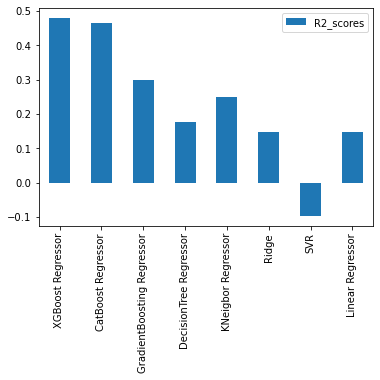

In [330]:
models_scores_df = pd.DataFrame(models_scores, index = ['R2_scores'])
models_scores_df
models_scores_df.T.plot.bar()

In [304]:
modelz = [
    ['Lasso: ', Lasso()], 
    ['Linear Regressor: ', LinearRegression()], 
    ['Ridge: ', Ridge()], 
    ['ElasticNet: ', ElasticNet(random_state=0)], 
    ['DecisionTreeRegresson: ', DecisionTreeRegressor()], 
    ['KNeighborsRegressor: ',  KNeighborsRegressor()], 
    ['SVR:' , SVR(kernel='rbf')], 
    ['RandomForest ', RandomForestRegressor()], 
    ['ExtraTreeRegressor :',ExtraTreesRegressor()], 
    ['GradientBoostingClassifier: ', GradientBoostingRegressor()] , 
    ['XGBRegressor: ', XGBRegressor()], 
    ['AdaBoostRegressor: ', AdaBoostRegressor()]
]

In [268]:
modelz[0][1]

Lasso()

In [323]:
from sklearn import metrics
model_data = []
for name, curr_model in modelz :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    curr_model_data['Test_MAE_Score'] = metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    model_data.append(curr_model_data)
#     # Getting the coefficient and intercept of the model
#     print("Model intercept  : ", curr_model.intercept_, "\n")
#     print("Model coefficient: ", curr_model.coef_, "\n")
    
    


Lasso(random_state=78)

LinearRegression()

Ridge(random_state=78)

ElasticNet(random_state=78)

DecisionTreeRegressor(random_state=78)

KNeighborsRegressor()

SVR()

RandomForestRegressor(random_state=78)

ExtraTreesRegressor(random_state=78)

GradientBoostingRegressor(random_state=78)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=78, ...)

AdaBoostRegressor(random_state=78)

In [318]:
models_scores_df

,XGBoost Regressor,CatBoost Regressor,GradientBoosting Regressor,DecisionTree Regressor,KNeigbor Regressor,Ridge,SVR,Linear Regressor
R2_scores,0.478797,0.465321,0.298214,0.176812,0.248834,0.149071,-0.096711,0.149076


In [324]:
model_data

[{'Name': 'Lasso: ',
  'Train_Time': 0.6299269199371338,
  'Train_R2_Score': 0.1715957228000512,
  'Test_R2_Score': 0.1470994149236633,
  'Test_RMSE_Score': 95.84492512435386,
  'Test_MAE_Score': 53.389595363912534},
 {'Name': 'Linear Regressor: ',
  'Train_Time': 0.03025531768798828,
  'Train_R2_Score': 0.17473453045513654,
  'Test_R2_Score': 0.14907592638848188,
  'Test_RMSE_Score': 95.73380521468773,
  'Test_MAE_Score': 53.590015128062824},
 {'Name': 'Ridge: ',
  'Train_Time': 0.017972946166992188,
  'Train_R2_Score': 0.17473454543929068,
  'Test_R2_Score': 0.14907083224027606,
  'Test_RMSE_Score': 95.73409177460378,
  'Test_MAE_Score': 53.59022390405511},
 {'Name': 'ElasticNet: ',
  'Train_Time': 0.40897154808044434,
  'Train_R2_Score': 0.15292677576071734,
  'Test_R2_Score': 0.13381458564377458,
  'Test_RMSE_Score': 96.58848395643803,
  'Test_MAE_Score': 53.70373608514864},
 {'Name': 'DecisionTreeRegresson: ',
  'Train_Time': 0.9884517192840576,
  'Train_R2_Score': 1.0,
  'Test_R2

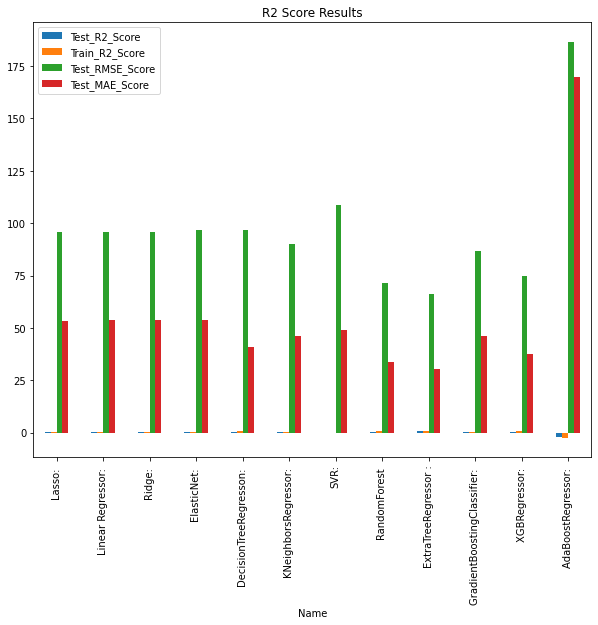

In [326]:
result_df = pd.DataFrame(model_data)
result_df.plot(x="Name", \
               y=['Test_R2_Score', 'Train_R2_Score', 'Test_RMSE_Score', 'Test_MAE_Score'], \
               kind="bar", \
               title = 'R2 Score Results', \
               figsize= (10,8)) ;

In [331]:
df.head()

,appliances_energy,lights,kitchen_temp,kitchen_humidity,livingroom_temp,livingroom_humidity,laundryroom_temp,laundryroom_humidity,officeroom_temp,officeroom_humidity,...,weather_station_pressure,weather_station_humidity,windspeed,visibility,weather_station_dewpoint,rv1,rv2,month,weekday,hour
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,1,0,17
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,1,0,17
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,1,0,17
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,1,0,17
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,1,0,17


In [332]:
df.columns

Index(['appliances_energy', 'lights', 'kitchen_temp', 'kitchen_humidity',
       'livingroom_temp', 'livingroom_humidity', 'laundryroom_temp',
       'laundryroom_humidity', 'officeroom_temp', 'officeroom_humidity',
       'bathroom_temp', 'bathroom_humidity', 'northside_temp',
       'northside_humidity', 'ironingroom_temp', 'ironingroom_humidity',
       'teenager_room_temp', 'teenager_room_humidity', 'parents_room_temp',
       'parents_room_humidity', 'weather_station_temp',
       'weather_station_pressure', 'weather_station_humidity', 'windspeed',
       'visibility', 'weather_station_dewpoint', 'rv1', 'rv2', 'month',
       'weekday', 'hour'],
      dtype='object')

In [339]:
x_temp = df[['livingroom_temp']]
y_temp = df[['northside_temp']]

In [340]:
m = LinearRegression()

In [341]:
train_x_temp, test_x_temp, train_y_temp, test_y_temp = train_test_split(x_temp, y_temp, test_size = 0.2, random_state = 5)

m.fit(train_x_temp, train_y_temp)

LinearRegression()

In [343]:
# Model evaluation for training set
train_y_temp_pred = m.predict(train_x_temp)
rmse = (np.sqrt(mean_squared_error(train_y_temp, train_y_temp_pred)))
r2 = r2_score(train_y_temp, train_y_temp_pred)


In [344]:
rmse
r2

3.6504085259787478

0.6397581938595979

In [348]:
df.head()

,appliances_energy,lights,kitchen_temp,kitchen_humidity,livingroom_temp,livingroom_humidity,laundryroom_temp,laundryroom_humidity,officeroom_temp,officeroom_humidity,...,weather_station_pressure,weather_station_humidity,windspeed,visibility,weather_station_dewpoint,rv1,rv2,month,weekday,hour
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,1,0,17
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,1,0,17
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,1,0,17
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,1,0,17
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,1,0,17


In [347]:
# Model evaluation for testing set
test_y_temp_pred = m.predict(test_x_temp)
rmse = (np.sqrt(mean_squared_error(test_y_temp, test_y_temp_pred)))
R2 = r2_score(test_y_temp, test_y_temp_pred)
R2

0.6501356764069022

In [379]:
df1.drop(columns = ['date', 'lights'], inplace = True)

KeyError: "['date', 'lights'] not found in axis"

In [349]:
from sklearn import preprocessing
df2 = df1.copy()
# Scale and plot the features against price (target) using the MinMax scaler (Normalization)
min_max_scaler = preprocessing.MinMaxScaler()

# df.drop(columns = ['lights', 'month', 'weekday', 'hour'], inplace = True)

In [380]:
df1.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [381]:
df1 = pd.DataFrame(data = min_max_scaler.fit_transform(df1), columns = df1.columns)

In [383]:
df1.head(3)

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848


In [382]:
XX = df1.drop(columns = ['Appliances'])
yy = df1[['Appliances']]

In [384]:
train_XX, test_XX, train_yy, test_yy = train_test_split(XX, yy, test_size = 0.3, random_state = 42)

m.fit(train_XX, train_yy)

LinearRegression()

In [385]:
# Model evaluation for testing set
test_yy_pred = m.predict(test_XX)
rmse = (np.sqrt(mean_squared_error(test_yy, test_yy_pred)))
r2 = r2_score(test_yy, test_yy_pred)
mae = metrics.mean_absolute_error(test_yy, m.predict(test_XX))

In [386]:
rmse, r2, mae

(0.08751044813727978, 0.14898028924851303, 0.05013360551290347)

The model which has minimum rmse and maximum r2 is performing the best.